In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
mouse_df.head()

# Combine the data into a single dataset
data_df = pd.merge(mouse_df, clinical_df, on='Mouse ID', how='outer')

# Display the data table for preview
data_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_data = data_df.groupby(['Drug','Timepoint'])
grp_mean_vol = grp_data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
grp_mean_vol_df = pd.DataFrame(grp_mean_vol)
grp_mean_vol_df.reset_index(inplace=True)

# Preview DataFrame
grp_mean_vol_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_grp_vol = grp_data['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
se_grp_vol_df = pd.DataFrame(se_grp_vol)
se_grp_vol_df.reset_index(inplace=True)

# Preview DataFrame
se_grp_vol_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
grp_mean_vol_df = grp_mean_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
se_grp_vol_df = se_grp_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
grp_mean_vol_df
se_grp_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


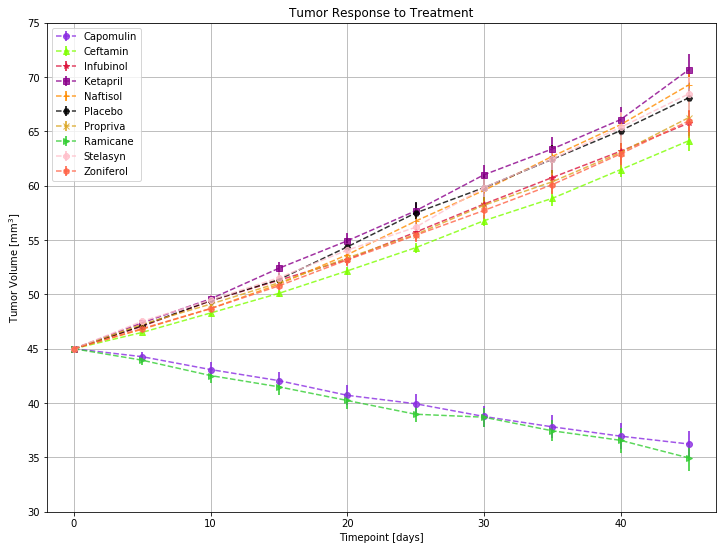

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=[12,9])
colors = ['#8A2BE2','#7FFF00','#DC143C','#8B008B','#FF8C00','#000000','#DAA520','#32CD32','#FFC0CB','#FF6347']
markers = 'o^*s+Hx>8h'

for x in range(len(grp_mean_vol_df.keys())):
    ax.errorbar(se_grp_vol_df.index.values.tolist(), grp_mean_vol_df.iloc[:,x], yerr=se_grp_vol_df.iloc[:,x], 
            alpha=0.80, fmt=markers[x], linestyle='dashed', color=colors[x], label=grp_mean_vol_df.keys()[x], elinewidth=2)
plt.title('Tumor Response to Treatment')
plt.xlabel('Timepoint [days]')
plt.ylabel('Tumor Volume [mm$^3$]')
plt.legend(loc='best')
plt.grid()
plt.ylim(30,75)
plt.xlim(min(se_grp_vol_df.index.values.tolist())-2, max(se_grp_vol_df.index.values.tolist())+2);

# Save the Figure
plt.savefig('tumor_response_to_treatment.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grp_mean_met = grp_data['Metastatic Sites'].mean()

# Convert to DataFrame
grp_mean_met_df = pd.DataFrame(grp_mean_met)
grp_mean_met_df.reset_index(inplace=True)

# Preview DataFrame
grp_mean_met_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_grp_met = grp_data['Metastatic Sites'].sem()

# Convert to DataFrame
se_grp_met_df = pd.DataFrame(se_grp_met)
se_grp_met_df.reset_index(inplace=True)

# Preview DataFrame
se_grp_met_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [8]:
# Minor Data Munging to Re-Format the Data Frames
grp_mean_met_df = grp_mean_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
se_grp_met_df = se_grp_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
grp_mean_met_df.head()
se_grp_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


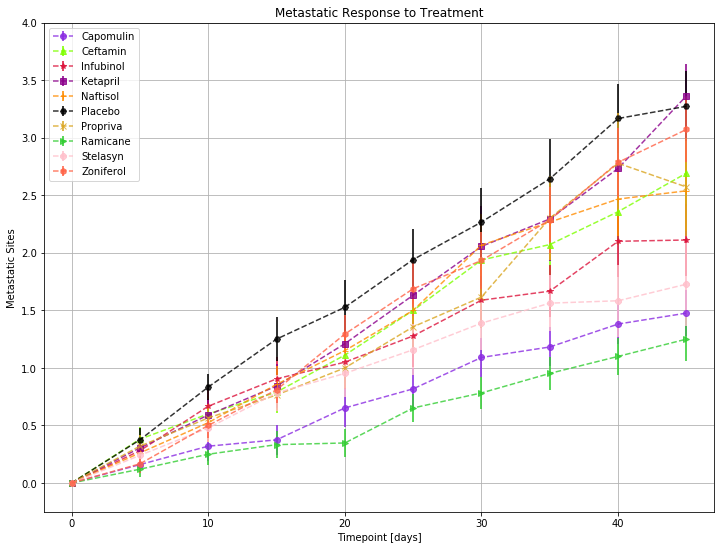

In [9]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=[12,9])

for x in range(len(grp_mean_met_df.keys())):
    ax.errorbar(se_grp_met_df.index.values.tolist(), grp_mean_met_df.iloc[:,x], yerr=se_grp_met_df.iloc[:,x], 
            alpha=0.80, fmt=markers[x], linestyle='dashed', color=colors[x], label=grp_mean_met_df.keys()[x], elinewidth=2)
plt.title('Metastatic Response to Treatment')
plt.xlabel('Timepoint [days]')
plt.ylabel('Metastatic Sites')
plt.legend(loc='best')
plt.grid()
plt.xlim(min(se_grp_met_df.index.values.tolist())-2, max(se_grp_met_df.index.values.tolist())+2);
plt.ylim(-0.25,4.0)

# Save the Figure
plt.savefig('metastatic_response_to_treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grp_ct = grp_data['Mouse ID'].count()

# Convert to DataFrame
grp_ct_df = pd.DataFrame(grp_ct)
grp_ct_df = grp_ct_df.rename(columns={'Mouse ID':'Mouse Count'})
grp_ct_df.reset_index(inplace=True)

# Preview DataFrame
grp_ct_df.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [11]:
# Minor Data Munging to Re-Format the Data Frames
grp_ct_df = grp_ct_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
grp_ct_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


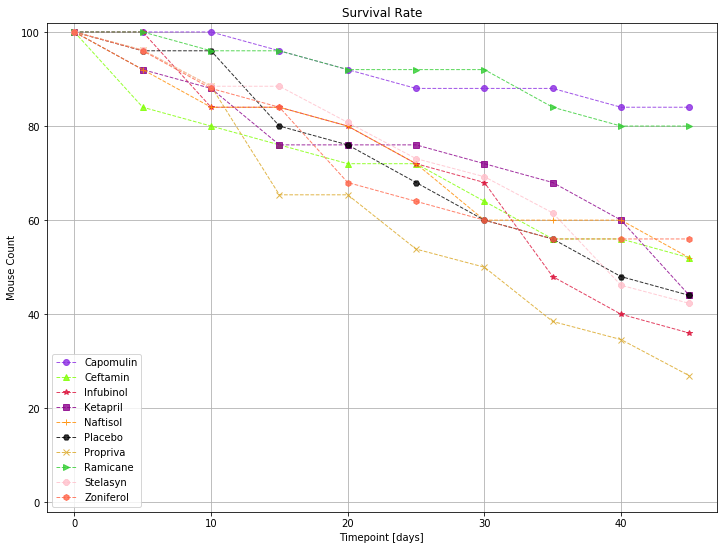

In [12]:
# Generate the Plot (Accounting for percentages)
grp_ct_df_perc = grp_ct_df
for drug in grp_ct_df.keys():
        grp_ct_df_perc[drug] = (grp_ct_df[drug]/grp_ct_df[drug][0])*100

fig, ax = plt.subplots(figsize=[12,9])
for x in range(len(grp_ct_df_perc.keys())):
    ax.plot(grp_ct_df_perc.index.values.tolist(), grp_ct_df_perc.iloc[:,x], alpha=0.80,
            linestyle='dashed', marker=markers[x], color=colors[x], label=grp_ct_df_perc.keys()[x], linewidth=1)
plt.title('Survival Rate')
plt.xlabel('Timepoint [days]')
plt.ylabel('Mouse Count')
plt.legend(loc='best')
plt.grid()
plt.xlim(min(grp_ct_df_perc.index.values.tolist())-2, max(grp_ct_df_perc.index.values.tolist())+2);
plt.ylim(-2,102);

# Save the Figure
plt.savefig('survival_rate.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug (TUMOR VOLUME)
per_change = grp_mean_vol_df.pct_change(periods=9)
per_change = (per_change.iloc[len(per_change)-1][per_change.keys()])*100

# Display the data to confirm
per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

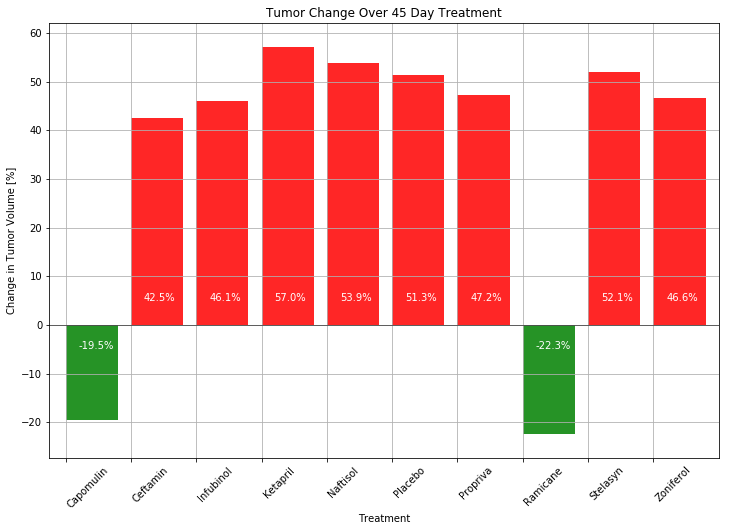

In [14]:
# Store all Relevant Percent Changes into a Tuple
per_change_tuple = tuple([per_change])

# Splice the data between passing and failing drugs
status = []
for drug in range(0,len(per_change)):
    if per_change[drug] < 0:
        status.append('pass')
    else:
        status.append('fail')

# I know I didn't need to make a DataFrame but it helped me visualize stuff
per_change_df = pd.DataFrame(per_change)
per_change_df.reset_index(inplace=True)
per_change_df = per_change_df.rename(columns={45:'Percent Change'})
per_change_df['Pass/Fail'] = status

x_axis = np.arange(len(per_change_df['Drug']))

# Plotting loop --> bars and nums
fig, ax = plt.subplots(figsize=[12,8])
for x in range(len(per_change_df)):
    if per_change_df['Pass/Fail'][x] == 'pass':
        set_color = 'g'
        yposition = -5
    else:
        set_color = 'r'
        yposition = 5
    plt.bar(x_axis[x], per_change[x], color=set_color, alpha=0.85, align="edge")
    fmt_text = f'{round(per_change[x],1)}%'
    plt.text(x_axis[x]+0.2, yposition, fmt_text, color='w')

# Orient widths. Add labels, tick marks, etc. 
plt.xticks(x_axis, per_change_df['Drug'], rotation=45, ha='left')
plt.axhline(y=0, color='k', linestyle='-',alpha=0.5, linewidth=1)
plt.grid()
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Treatment')
plt.ylabel('Change in Tumor Volume [%]')
plt.xlim(-0.25,len(per_change))
plt.ylim(min(per_change)-5,max(per_change)+5)

# Save the Figure
plt.savefig('tumor_change.png')

# Show the Figure
plt.show()

In [15]:
# Include a written description of three observable trends based on the data
    #1) Capomulin and Ramicane were the only two treatments with an overall negative percent
    #   change in tumor volume size over the 45 days of treatment.
    #2) Nearly all treatments in comparison to the placebo resulted in some
    #   reduced metastatic response over time.
    #3) Tumor responses (tumor volume) to all other treatments besides Capomulin and Ramicane
    #   were very similar to the placebo.